In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import spacy
from nltk.tokenize import RegexpTokenizer
from nltk import word_tokenize 
from nltk.stem import WordNetLemmatizer 


In [2]:
qpr = pd.read_csv('../2-cleaning/qpr_combined.csv')
qpr_p = pd.read_csv('../1-data-collection/qpr_posts.csv')

liv = pd.read_csv('../2-cleaning/liv_final.csv')

qpr_one = pd.read_csv('../2-cleaning/qpr_one_word.csv')
liv_one = pd.read_csv('../2-cleaning/liv_one.csv')

In [3]:
class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, articles):
        return [self.wnl.lemmatize(t) for t in word_tokenize(articles)]

In [4]:
qpr

,subreddit,body,length,post_date
0,superhoops,Calls him a disgrace but still says he's a goo...,24,2011-09-26
1,superhoops,BBC - Football Tactics: Goal-shy QPR in need o...,11,2011-09-26
2,superhoops,"26 Sept 2011: 'If you are hurting inside, you ...",37,2011-09-26
3,superhoops,"This is a great resource, which I've been usin...",34,2011-09-26
4,superhoops,Warnock unhappy with refereeing decisions in g...,12,2011-09-26
...,...,...,...,...
8471,superhoops,get yourself a decent striker as soon as possi...,9,2023-03-25
8472,superhoops,"done a few, unlike irl dykes is actually quite...",46,2023-03-25
8473,superhoops,Sign Taraabt again,3,2023-03-25
8474,superhoops,I’d start with all of them and see where that ...,12,2023-03-25


In [5]:
qpr['body'] = qpr['body'].str.replace('\d+', '') # for digits
qpr['body'] = qpr['body'].str.replace(r'(\b\w{1,2}\b)', '') # for words
qpr['body'] = qpr['body'].str.replace('[^\w\s]', '') # for punctuation 

/var/folders/5h/p8nqld_13hg44lctlhg2ns8c0000gn/T/ipykernel_4902/3099473593.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  qpr['body'] = qpr['body'].str.replace('\d+', '') # for digits
/var/folders/5h/p8nqld_13hg44lctlhg2ns8c0000gn/T/ipykernel_4902/3099473593.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  qpr['body'] = qpr['body'].str.replace(r'(\b\w{1,2}\b)', '') # for words
/var/folders/5h/p8nqld_13hg44lctlhg2ns8c0000gn/T/ipykernel_4902/3099473593.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  qpr['body'] = qpr['body'].str.replace('[^\w\s]', '') # for punctuation


In [6]:
tokenizer = RegexpTokenizer(r'[a-z0-9,.]+')

In [7]:
qpr_tokens = qpr.copy()

In [8]:
qpr_tokens['tokens'] = qpr.apply(lambda x: tokenizer.tokenize(x['body'].lower()), axis = 1)

In [9]:
cvx = CountVectorizer(tokenizer=LemmaTokenizer(),
                      stop_words='english', min_df=5, max_df=0.5)

qpr_tk = cvx.fit_transform(qpr['body'])
qpr_tk = pd.DataFrame(qpr_tk.todense(), columns=cvx.get_feature_names_out())


/Users/bede/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Users/bede/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn(


In [10]:
qpr_tk

,aaron,ability,able,abroad,absence,absolute,absolutely,abundance,abuse,abysmal,...,younger,youngster,youth,youtube,ysy,yun,zamora,zarate,zero,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8471,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8472,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8473,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8474,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
qpr_tk.sum().nlargest(15)

qpr       3078
wa        2218
game      2007
player    1734
season    1706
ha        1436
like      1371
team      1364
think     1311
club      1292
just      1114
good      1094
time       962
year       950
fan        884
dtype: int64

In [12]:
liv['body'] = liv['body'].str.replace('\d+', '') # for digits
liv['body'] = liv['body'].str.replace(r'(\b\w{1,2}\b)', '') # for words
liv['body'] = liv['body'].str.replace('[^\w\s]', '') # for punctuation 
liv.body.replace({r'[^\x00-\x7F]+':''}, regex=True, inplace=True)


liv.body = liv.body.str.replace('_', '')

/var/folders/5h/p8nqld_13hg44lctlhg2ns8c0000gn/T/ipykernel_4902/1867941016.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  liv['body'] = liv['body'].str.replace('\d+', '') # for digits
/var/folders/5h/p8nqld_13hg44lctlhg2ns8c0000gn/T/ipykernel_4902/1867941016.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  liv['body'] = liv['body'].str.replace(r'(\b\w{1,2}\b)', '') # for words
/var/folders/5h/p8nqld_13hg44lctlhg2ns8c0000gn/T/ipykernel_4902/1867941016.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  liv['body'] = liv['body'].str.replace('[^\w\s]', '') # for punctuation


In [14]:
liv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220456 entries, 0 to 220455
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   subreddit     220456 non-null  object 
 1   body          220456 non-null  object 
 2   score         220456 non-null  float64
 3   length        220456 non-null  int64  
 4   num_comments  220456 non-null  int64  
 5   date_posted   220456 non-null  object 
 6   id            220456 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 11.8+ MB


In [15]:
liv_tk = cvx.fit_transform(liv['body'])
liv_tk = pd.DataFrame(liv_tk.todense(), columns=cvx.get_feature_names_out())

/Users/bede/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [16]:
liv_tk

,aaaaaand,aaaaand,aaaand,aage,aak,aanholt,aarhus,aaron,ab,abandon,...,zouma,zrich,zuber,zulte,zuniga,zurich,zusi,zuu,zvezda,zwolle
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220451,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
220452,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
220453,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
220454,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
liv_tk.sum().nlargest(15)

liverpool    85960
game         33978
wa           33725
goal         29968
player       29402
league       28182
ha           26502
season       26424
match        22519
team         22102
just         21268
klopp        20421
time         20231
like         18197
think        17128
dtype: int64

In [18]:
qpr_tk.shape, qpr.shape

((8476, 3739), (8476, 4))

In [19]:
liv_tk.shape, liv.shape

((220456, 20582), (220456, 7))

In [20]:
qpr = qpr[qpr.length > 5]

In [21]:
liv

,subreddit,body,score,length,num_comments,date_posted,id
0,LiverpoolFC,Maybe the England lads were diversion,1.0,7,0,2023-03-27 22:13:10,1242m5s
1,LiverpoolFC,Jude Bellingham would unbelievable for Liverp...,1.0,10,0,2023-03-27 21:56:08,12422ji
2,LiverpoolFC,Henderson Jude Bellingham can high wants ...,1.0,50,0,2023-03-27 21:51:21,1241x6w
3,LiverpoolFC,David Ornstein Liverpool yet open contract ta...,1.0,45,0,2023-03-27 18:07:27,123v550
4,LiverpoolFC,Giannis Chorianopoulos Tsimikas out after mi...,1.0,21,0,2023-03-27 16:27:40,123s7pk
...,...,...,...,...,...,...,...
220451,LiverpoolFC,SInce the Liverpool undoubtedly hitting some ...,4.0,86,13,2010-11-08 19:00:43,e31m1
220452,LiverpoolFC,Leivinho bossing the game against Chelsea vid,11.0,7,6,2010-11-08 15:07:42,e2xqs
220453,LiverpoolFC,Rumor Christian Poulsen Set for January Exit,6.0,7,6,2010-11-08 14:41:40,e2xdl
220454,LiverpoolFC,MOTM years old can keep putting performa...,12.0,31,12,2010-11-07 22:38:51,e2n90


In [22]:
qpr_p

,subreddit,selftext,score,length,num_comments,utc_datetime_str,id
0,superhoops,Hey guys. I’m making a Queens Park Rangers Car...,1,35,0,2023-03-25,121vebo
1,superhoops,Gareth Ainsworth: EFL financial woes not helpe...,1,12,0,2023-03-22,11yaovc
2,superhoops,Watford lose Wilder's first game as Rangers en...,1,11,0,2023-03-12,11p6t24
3,superhoops,Wesley Hoedt refuses to shake hands with Garet...,1,12,0,2023-03-11,11opn12
4,superhoops,Tyler Roberts returning to Leeds to review inj...,1,17,0,2023-03-10,11nchpj
...,...,...,...,...,...,...,...
3137,superhoops,Wonder what he has on QPR for the 23rd.\n\nFro...,1,82,0,2011-09-28,kufkn
3138,superhoops,BBC - Football Tactics: Goal-shy QPR in need o...,1,11,0,2011-09-26,ks88o
3139,superhoops,"26 Sept 2011: 'If you are hurting inside, you ...",1,37,0,2011-09-26,ks2t3
3140,superhoops,"Open All R's: A fairly new, independent weekly...",3,28,1,2011-09-26,krxxx


In [23]:
qpr_p.rename(columns = {
    'selftext' : 'body',
    'utc_datetime_str' : 'date_posted'
}, inplace = True)

In [24]:
qpr_p

,subreddit,body,score,length,num_comments,date_posted,id
0,superhoops,Hey guys. I’m making a Queens Park Rangers Car...,1,35,0,2023-03-25,121vebo
1,superhoops,Gareth Ainsworth: EFL financial woes not helpe...,1,12,0,2023-03-22,11yaovc
2,superhoops,Watford lose Wilder's first game as Rangers en...,1,11,0,2023-03-12,11p6t24
3,superhoops,Wesley Hoedt refuses to shake hands with Garet...,1,12,0,2023-03-11,11opn12
4,superhoops,Tyler Roberts returning to Leeds to review inj...,1,17,0,2023-03-10,11nchpj
...,...,...,...,...,...,...,...
3137,superhoops,Wonder what he has on QPR for the 23rd.\n\nFro...,1,82,0,2011-09-28,kufkn
3138,superhoops,BBC - Football Tactics: Goal-shy QPR in need o...,1,11,0,2011-09-26,ks88o
3139,superhoops,"26 Sept 2011: 'If you are hurting inside, you ...",1,37,0,2011-09-26,ks2t3
3140,superhoops,"Open All R's: A fairly new, independent weekly...",3,28,1,2011-09-26,krxxx


In [25]:
liv.date_posted = liv.date_posted.str[:10]

In [26]:
liv_p = liv

In [27]:
qpr_liv_posts = pd.concat((liv_p, qpr_p), axis = 0)

In [28]:
qpr_liv_posts

,subreddit,body,score,length,num_comments,date_posted,id
0,LiverpoolFC,Maybe the England lads were diversion,1.0,7,0,2023-03-27,1242m5s
1,LiverpoolFC,Jude Bellingham would unbelievable for Liverp...,1.0,10,0,2023-03-27,12422ji
2,LiverpoolFC,Henderson Jude Bellingham can high wants ...,1.0,50,0,2023-03-27,1241x6w
3,LiverpoolFC,David Ornstein Liverpool yet open contract ta...,1.0,45,0,2023-03-27,123v550
4,LiverpoolFC,Giannis Chorianopoulos Tsimikas out after mi...,1.0,21,0,2023-03-27,123s7pk
...,...,...,...,...,...,...,...
3137,superhoops,Wonder what he has on QPR for the 23rd.\n\nFro...,1.0,82,0,2011-09-28,kufkn
3138,superhoops,BBC - Football Tactics: Goal-shy QPR in need o...,1.0,11,0,2011-09-26,ks88o
3139,superhoops,"26 Sept 2011: 'If you are hurting inside, you ...",1.0,37,0,2011-09-26,ks2t3
3140,superhoops,"Open All R's: A fairly new, independent weekly...",3.0,28,1,2011-09-26,krxxx


In [29]:
qpr_p.num_comments.mean()

3.0642902609802674

In [30]:
liv_p.num_comments.mean()

30.34500762056828

In [31]:
qpr_p_tot = len(qpr_p)
liv_p_tot = len(liv_p)

In [32]:

def posts_per_year(date_col):
    team_dict = {}
    for year in date_col.str[:4].sort_values(ascending = True).unique():
        team_dict[year] = len(date_col[date_col.str[:4] == year])
    return team_dict

In [33]:
liv_dict = posts_per_year(liv_p.date_posted)

In [34]:
liv_dict

{'2010': 85,
 '2011': 1870,
 '2012': 6128,
 '2013': 10698,
 '2014': 19839,
 '2015': 19413,
 '2016': 20258,
 '2017': 25754,
 '2018': 37096,
 '2019': 35401,
 '2020': 23446,
 '2021': 14843,
 '2022': 2081,
 '2023': 3544}

In [35]:
qpr_dict = posts_per_year(qpr_p.date_posted)

In [36]:
qpr_dict

{'2011': 49,
 '2012': 341,
 '2013': 421,
 '2014': 667,
 '2015': 554,
 '2016': 331,
 '2017': 191,
 '2018': 129,
 '2019': 141,
 '2020': 145,
 '2021': 109,
 '2022': 17,
 '2023': 47}

In [37]:
sns.set_style(None)

In [38]:
liv_positions = {
    '2010' : 7,
    '2011' : 6,
    '2012' : 8,
    '2013' : 7,
    '2014' : 2,
    '2015' : 6,
    '2016' : 8,
    '2017' : 4,
    '2018' : 4,
    '2019' : 2,
    '2020' : 1,
    '2021' : 3,
    '2022' : 2,
    '2023' : 6
}
qpr_positions = {
    '2011' : 21,
    '2012' : 17,
    '2013' : 20,
    '2014' : 24,
    '2015' : 20,
    '2016' : 32,
    '2017' : 38,
    '2018' : 36,
    '2019' : 39,
    '2020' : 33,
    '2021' : 29,
    '2022' : 31,
    '2023' : 39
}

In [39]:
sns.set_style('dark')

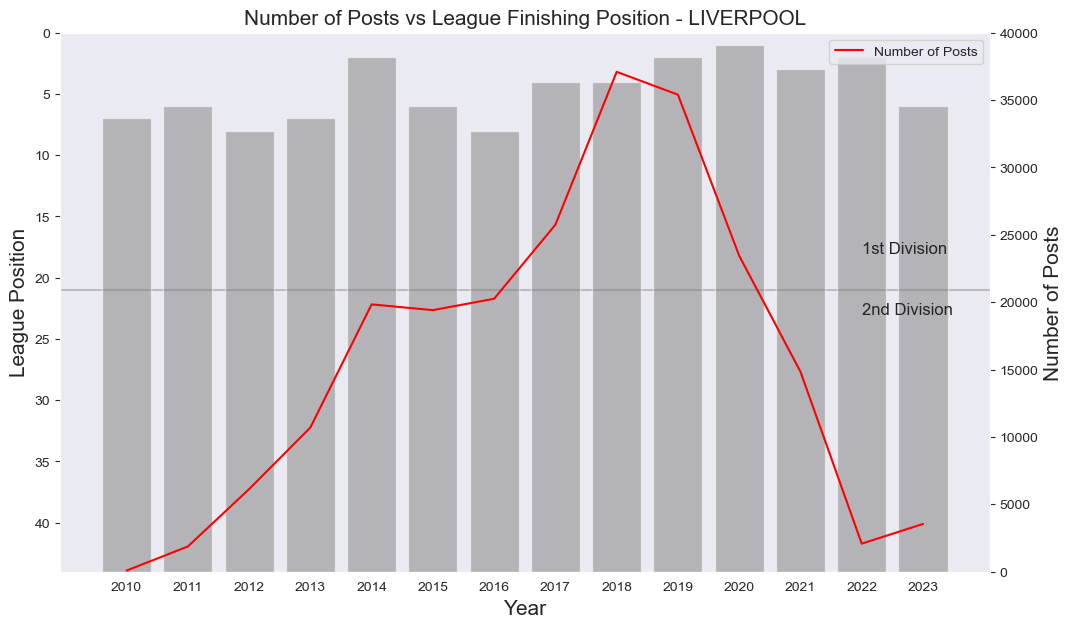

In [40]:
fig, axs = plt.subplots(1,figsize = (12, 7))

axs.bar(x = list(liv_positions.keys()),
        height = 44*np.ones(len(list(liv_positions.values())))-list(liv_positions.values()), 
        bottom= list(liv_positions.values()),
        color = 'grey',
        alpha = 0.5,
        zorder = 10)
axs.set_ylim(44,0)
ax2 = axs.twinx()
ax2.grid(False)

sns.lineplot(x = liv_dict.keys(),
            y = liv_dict.values(),
            ax = ax2,
            color = 'red',
            label = 'Number of Posts'

            )
axs.set_xlabel('Year', fontsize=15)
axs.set_ylabel('League Position', fontsize = 15)
ax2.set_ylabel('Number of Posts', fontsize=15)
ax2.set_title('Number of Posts vs League Finishing Position - LIVERPOOL', fontsize=15)
ax2.set_ylim(0, 40000)
axs.axhline(21, alpha = 0.2, color = 'black')
axs.text('2022', 18, '1st Division', fontsize=12, zorder = 11)
axs.text('2022', 23, '2nd Division', fontsize=12, zorder = 11);

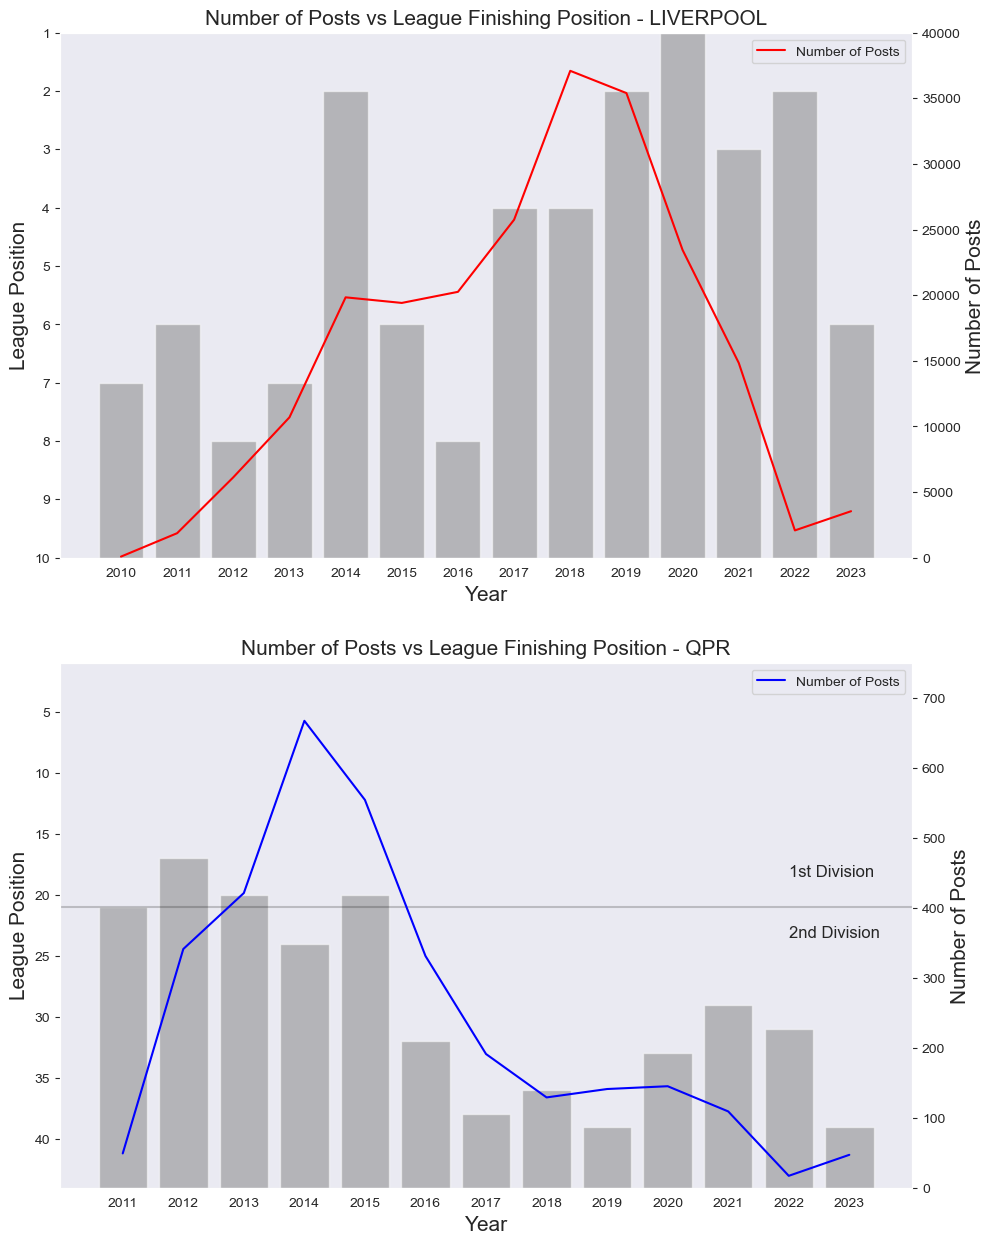

In [41]:
fig, axs = plt.subplots(2,figsize = (11, 15))

axs[0].bar(x = list(liv_positions.keys()),
        height = 10*np.ones(len(list(liv_positions.values())))-list(liv_positions.values()), 
        bottom= list(liv_positions.values()),
        color = 'grey',
        alpha = 0.5,
        zorder = 1
          )

axs[0].set_ylim(10,1)
ax2 = axs[0].twinx()
ax2.grid(False)

sns.lineplot(x = liv_dict.keys(),
            y = liv_dict.values(),
            ax = ax2,
            color = 'red',
            label = 'Number of Posts'
            )
axs[0].set_xlabel('Year', fontsize=15)
axs[0].set_ylabel('League Position', fontsize = 15)
ax2.set_ylabel('Number of Posts', fontsize=15)
ax2.set_title('Number of Posts vs League Finishing Position - LIVERPOOL', fontsize=15)
ax2.set_ylim(0, 40000)


axs[1].bar(x = list(qpr_positions.keys()),
        height = 44*np.ones(len(list(qpr_positions.values())))-list(qpr_positions.values()), 
        bottom= list(qpr_positions.values()),
        color = 'grey',
        alpha = 0.5,
        zorder = 1)
axs[1].set_ylim(44,1)
ax4 = axs[1].twinx()
ax4.grid(False)

sns.lineplot(x = qpr_dict.keys(),
            y = qpr_dict.values(),
            ax = ax4,
            color = 'blue',
            label = 'Number of Posts'

            )
axs[1].set_xlabel('Year', fontsize=15)
axs[1].set_ylabel('League Position', fontsize = 15)
axs[1].axhline(21, alpha = 0.2, color = 'black')
ax4.set_ylabel('Number of Posts', fontsize=15)
ax4.set_title('Number of Posts vs League Finishing Position - QPR', fontsize=15)
ax4.set_ylim(0, 750)
axs[1].text('2022', 18.5, '1st Division', fontsize=12)
axs[1].text('2022', 23.5, '2nd Division', fontsize=12);


In [42]:
qpr_p.length.mean()

46.229471674092935

In [43]:
liv_p.length.mean()

35.59549297819066

In [44]:
qpr_p.score.mean()

6.4901336728198595

In [45]:
liv_p.score.mean()

101.22941539354792

In [46]:
qpr_post_scores = {}
for year in qpr_p.date_posted.str[:4].sort_values(ascending = True).unique():
    qpr_post_scores[year] = qpr_p[qpr_p.date_posted.str[:4] == year].score.mean()
    

In [47]:
liv_post_scores = {}
for year in liv_p.date_posted.str[:4].sort_values(ascending = True).unique():
    liv_post_scores[year] = liv_p[liv_p.date_posted.str[:4] == year].score.mean()
    

In [48]:
qpr_post_scores

{'2011': 2.326530612244898,
 '2012': 3.067448680351906,
 '2013': 4.330166270783848,
 '2014': 6.275862068965517,
 '2015': 6.98014440433213,
 '2016': 6.495468277945619,
 '2017': 6.481675392670157,
 '2018': 7.48062015503876,
 '2019': 9.652482269503546,
 '2020': 12.441379310344828,
 '2021': 16.24770642201835,
 '2022': 1.0,
 '2023': 1.0638297872340425}

In [49]:
liv_post_scores

{'2010': 5.223529411764706,
 '2011': 10.43101604278075,
 '2012': 16.448596605744125,
 '2013': 23.746214245653395,
 '2014': 27.21588789757548,
 '2015': 32.89501880183382,
 '2016': 54.23111857044131,
 '2017': 72.70874427273434,
 '2018': 125.53108151822299,
 '2019': 161.3099629953956,
 '2020': 181.96575108760555,
 '2021': 212.10914235666644,
 '2022': 1.1508889956751562,
 '2023': 2.209650112866817}

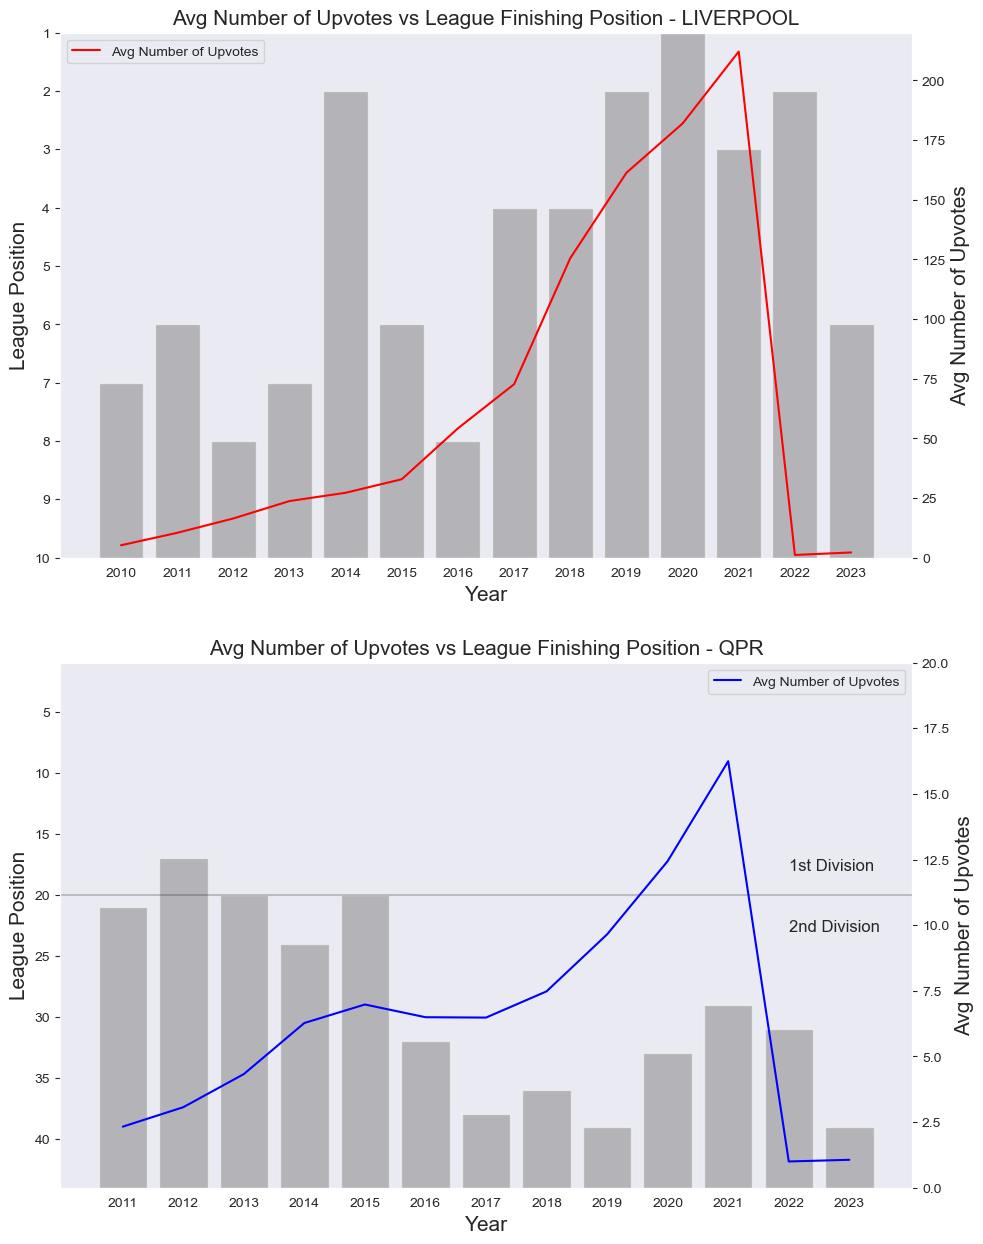

In [50]:
fig, axs = plt.subplots(2,figsize = (11, 15))


axs[0].bar(x = list(liv_positions.keys()),
        height = 10*np.ones(len(list(liv_positions.values())))-list(liv_positions.values()), 
        bottom= list(liv_positions.values()),
        color = 'grey',
        alpha = 0.5,
        zorder = 1
          )

axs[0].set_ylim(10,1)
ax2 = axs[0].twinx()
ax2.grid(False)

sns.lineplot(x = liv_post_scores.keys(),
            y = liv_post_scores.values(),
            ax = ax2,
            color = 'red',
            label = 'Avg Number of Upvotes'
            )
axs[0].set_xlabel('Year', fontsize=15)
axs[0].set_ylabel('League Position', fontsize = 15)
ax2.set_ylabel('Avg Number of Upvotes', fontsize=15)
ax2.set_title('Avg Number of Upvotes vs League Finishing Position - LIVERPOOL', fontsize=15)
ax2.set_ylim(0, 220)


axs[1].bar(x = list(qpr_positions.keys()),
        height = 44*np.ones(len(list(qpr_positions.values())))-list(qpr_positions.values()), 
        bottom= list(qpr_positions.values()),
        color = 'grey',
        alpha = 0.5,
        zorder = 1)
axs[1].set_ylim(44,1)
ax4 = axs[1].twinx()
ax4.grid(False)

sns.lineplot(x = qpr_post_scores.keys(),
            y = qpr_post_scores.values(),
            ax = ax4,
            color = 'blue',
            label = 'Avg Number of Upvotes'

            )
axs[1].set_xlabel('Year', fontsize=15)
axs[1].set_ylabel('League Position', fontsize = 15)
axs[1].axhline(20, alpha = 0.2, color = 'black')
ax4.set_ylabel('Avg Number of Upvotes', fontsize=15)
ax4.set_title('Avg Number of Upvotes vs League Finishing Position - QPR', fontsize=15)
ax4.set_ylim(0, 20)
axs[1].text('2022', 18, '1st Division', fontsize=12)
axs[1].text('2022', 23, '2nd Division', fontsize=12);


In [51]:
liv_post_lengths = {}
for year in liv_p.date_posted.str[:4].sort_values(ascending = True).unique():
    liv_post_lengths[year] = liv_p[liv_p.date_posted.str[:4] == year].length.mean()

In [52]:
del liv_post_lengths['2010']

In [53]:
liv_post_lengths

{'2011': 38.006951871657755,
 '2012': 42.799771540469976,
 '2013': 39.627967844456904,
 '2014': 44.762437622864056,
 '2015': 46.238654509864524,
 '2016': 48.465149570540035,
 '2017': 40.40347130542828,
 '2018': 30.249973042915677,
 '2019': 27.423151888364735,
 '2020': 26.754926213426597,
 '2021': 27.466617260661593,
 '2022': 24.082652570879386,
 '2023': 27.973476297968396}

In [54]:
qpr_post_lengths = {}
for year in qpr_p.date_posted.str[:4].sort_values(ascending = True).unique():
    qpr_post_lengths[year] = qpr_p[qpr_p.date_posted.str[:4] == year].length.mean()

In [55]:
qpr_post_scores

{'2011': 2.326530612244898,
 '2012': 3.067448680351906,
 '2013': 4.330166270783848,
 '2014': 6.275862068965517,
 '2015': 6.98014440433213,
 '2016': 6.495468277945619,
 '2017': 6.481675392670157,
 '2018': 7.48062015503876,
 '2019': 9.652482269503546,
 '2020': 12.441379310344828,
 '2021': 16.24770642201835,
 '2022': 1.0,
 '2023': 1.0638297872340425}

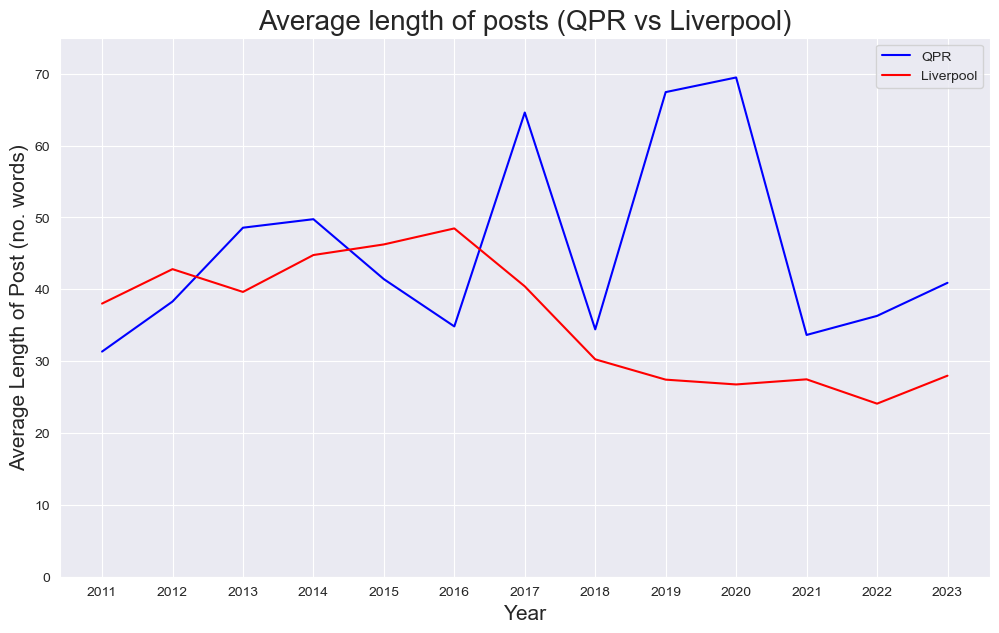

In [56]:
sns.set_style('darkgrid')
fig, axs = plt.subplots(figsize = (12, 7))

sns.lineplot(x = qpr_post_lengths.keys(),
            y = qpr_post_lengths.values(),
            ax = axs,
            color = 'blue',
            label = 'QPR')
sns.lineplot(x = liv_post_lengths.keys(),
            y = liv_post_lengths.values(),
            ax = axs,
            color = 'red',
            label = 'Liverpool')
axs.set_ylim(0,75)
axs.set_xlabel('Year', fontsize = 15)
axs.set_ylabel('Average Length of Post (no. words)', fontsize=15)
axs.set_title('Average length of posts (QPR vs Liverpool)', fontsize=20);


In [57]:
qpr.head()

,subreddit,body,length,post_date
0,superhoops,Calls him disgrace but still says good play...,24,2011-09-26
1,superhoops,BBC Football Tactics Goalshy QPR need forma...,11,2011-09-26
2,superhoops,Sept you are hurting inside you can really ...,37,2011-09-26
3,superhoops,This great resource which been using since ...,34,2011-09-26
4,superhoops,Warnock unhappy with refereeing decisions gam...,12,2011-09-26


In [58]:
liv = liv_p[['subreddit', 'body', 'length', 'date_posted']]

In [59]:
qpr.rename(columns = {
    'post_date' : 'date_posted'
}, inplace = True)

/var/folders/5h/p8nqld_13hg44lctlhg2ns8c0000gn/T/ipykernel_4902/3920453654.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qpr.rename(columns = {


In [60]:
liv.subreddit.value_counts()

LiverpoolFC    220456
Name: subreddit, dtype: int64

In [61]:
qpr

,subreddit,body,length,date_posted
0,superhoops,Calls him disgrace but still says good play...,24,2011-09-26
1,superhoops,BBC Football Tactics Goalshy QPR need forma...,11,2011-09-26
2,superhoops,Sept you are hurting inside you can really ...,37,2011-09-26
3,superhoops,This great resource which been using since ...,34,2011-09-26
4,superhoops,Warnock unhappy with refereeing decisions gam...,12,2011-09-26
...,...,...,...,...
8470,superhoops,Gareth Ainsworth EFL financial woes not helped...,12,2023-03-22
8471,superhoops,get yourself decent striker soon possible,9,2023-03-25
8472,superhoops,done few unlike irl dykes actually quite pro...,46,2023-03-25
8474,superhoops,start with all them and see where that gets you,12,2023-03-25


In [62]:
# liv.to_csv('../4-preprocessing-modelling/liv-2.csv', index = False)
# qpr.to_csv('../4-preprocessing-modelling/qpr.csv', index = False)